# Impor Libraries

In [1]:
from modules.gnn import GNN
from modules.models import GraphSAGE, GCN
from modules.predictors import DotPredictor, MLPPredictor
import torch.nn.functional as F
from torch.optim import Adam
import itertools
import dgl
import torch
import matplotlib.pyplot as plt
import os
from gensim.models import Word2Vec

c:\Users\Vale\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Caso 1: 
    * Model :GraphSAGE
    * Features : Todos
    * Predictor : MLPPredictor
    

Done saving data into cached files.
None
In epoch 0, loss: 0.9856212735176086
In epoch 10, loss: 0.6871567964553833
In epoch 20, loss: 0.37737149000167847
In epoch 30, loss: 0.2624858617782593
In epoch 40, loss: 0.21256868541240692
In epoch 50, loss: 0.18794992566108704
In epoch 60, loss: 0.17130839824676514
In epoch 70, loss: 0.16022327542304993
In epoch 80, loss: 0.15553569793701172
In epoch 90, loss: 0.14801593124866486


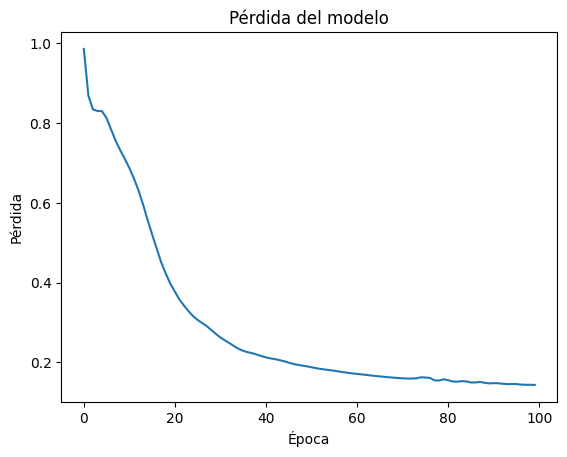

In [13]:

data_path = "datasets/DGL_Graph/MYCODEMultiDiGraph/"

gnn = GNN(debug = True)
gnn.load_dataset(data_path,force_reload= True) # No hay nodos con grado 0
gnn.split_dataset()


edge_label = gnn.dgl_graph.edata['Relationship']
train_mask = gnn.train_mask
test_mak = gnn.test_mask

in_feats = gnn.dgl_graph.ndata["feat"].size(1) #72
h_feats = 16
# model = GCN(in_feats, h_feats, num_clases)
# pred = DotPredictor()

model = GraphSAGE(gnn.dgl_graph.ndata['feat'].shape[1], 16,8)
pred = MLPPredictor(8,3)

# ----------- 3. set up loss and optimizer -------------- #

optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #

# Lista para almacenar los valores de pérdida
loss_values = []

for e in range(100):
  # forward
  h = model(gnn.dgl_graph, gnn.dgl_graph.ndata['feat'])
  logits =  pred(gnn.dgl_graph, h)
  # scores = torch.argmax(logits, dim=1)
  scores = logits.argmax(1)
  labels = gnn.dgl_graph.edata["Relationship"].to(torch.int64)
  loss = F.cross_entropy(logits[train_mask], labels[train_mask])

  # Almacenar el valor de pérdida
  loss_values.append(loss.item())

  # backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 10 == 0:
    print('In epoch {}, loss: {}'.format(e, loss))
    # scores_numpy = numpyscores.numpy()

# #     # print(f'AUC {roc_auc_score(labels.detach().numpy(), scores.detach().numpy())}') #NO PODER DETACH!!!!!!!!!!!!!!
# # # print(f'AUC {roc_auc_score(labels.detach().numpy(), scores.detach().numpy())}')



plt.plot(loss_values)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()


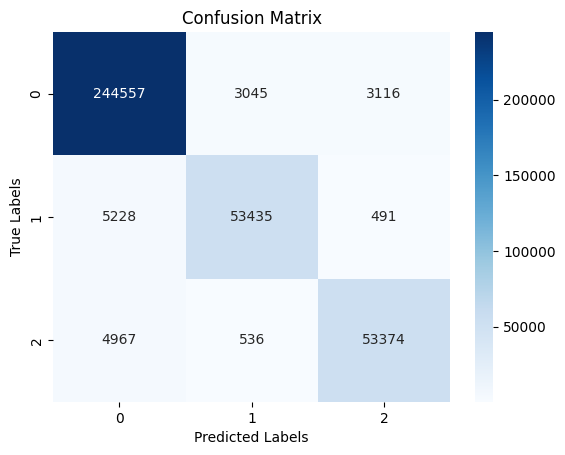

In [14]:
from utils import cal_acc_pres_f1
true_labels = gnn.dgl_graph.edata["Relationship"][test_mak]
predicted_scores = scores.detach().numpy()[test_mak]
cal_acc_pres_f1(predicted_scores,true_labels, threshold=None)

# Caso 2: 
    * Model :GraphSAGE
    * Features : in_degree y out_degree
    * Predictor : MLPPredictor
    

Done saving data into cached files.
None
In epoch 0, loss: 165.9169464111328
In epoch 10, loss: 22.16558837890625
In epoch 20, loss: 9.07861042022705
In epoch 30, loss: 4.5107550621032715
In epoch 40, loss: 2.930295944213867
In epoch 50, loss: 2.863776445388794
In epoch 60, loss: 1.4197754859924316
In epoch 70, loss: 1.3697715997695923
In epoch 80, loss: 1.4906331300735474
In epoch 90, loss: 0.8068255186080933


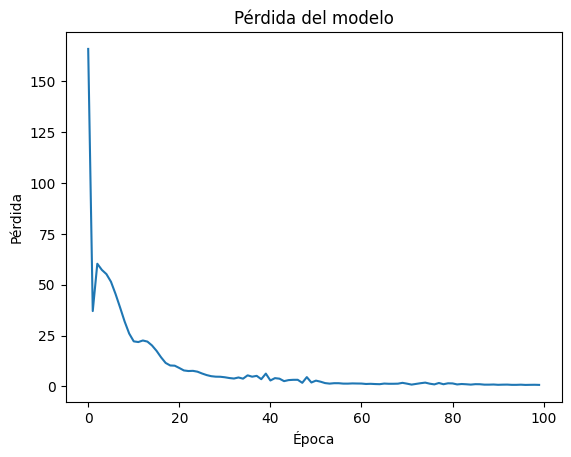

In [15]:

data_path = "datasets/DGL_Graph/MYCODEMultiDiGraphDegree/"

gnn = GNN(debug = True)
gnn.load_dataset(data_path,force_reload= True) # No hay nodos con grado 0
gnn.split_dataset()

gnn.dgl_graph.ndata['feat'] = gnn.dgl_graph.ndata['feat'].float() # FIXME:

edge_label = gnn.dgl_graph.edata['Relationship']
train_mask = gnn.train_mask
test_mak = gnn.test_mask

in_feats = gnn.dgl_graph.ndata["feat"].size(1) #72
h_feats = 16
# model = GCN(in_feats, h_feats, num_clases)
# pred = DotPredictor()

model = GraphSAGE(gnn.dgl_graph.ndata['feat'].shape[1], 16,8)
pred = MLPPredictor(8,3)

# ----------- 3. set up loss and optimizer -------------- #

optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #

# Lista para almacenar los valores de pérdida
loss_values = []

for e in range(100):
  # forward
  h = model(gnn.dgl_graph, gnn.dgl_graph.ndata['feat'])
  logits =  pred(gnn.dgl_graph, h)
  # scores = torch.argmax(logits, dim=1)
  scores = logits.argmax(1)
  labels = gnn.dgl_graph.edata["Relationship"].to(torch.int64)
  loss = F.cross_entropy(logits[train_mask], labels[train_mask])

  # Almacenar el valor de pérdida
  loss_values.append(loss.item())

  # backward
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if e % 10 == 0:
    print('In epoch {}, loss: {}'.format(e, loss))
    # scores_numpy = numpyscores.numpy()

# #     # print(f'AUC {roc_auc_score(labels.detach().numpy(), scores.detach().numpy())}') #NO PODER DETACH!!!!!!!!!!!!!!
# # # print(f'AUC {roc_auc_score(labels.detach().numpy(), scores.detach().numpy())}')



plt.plot(loss_values)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()


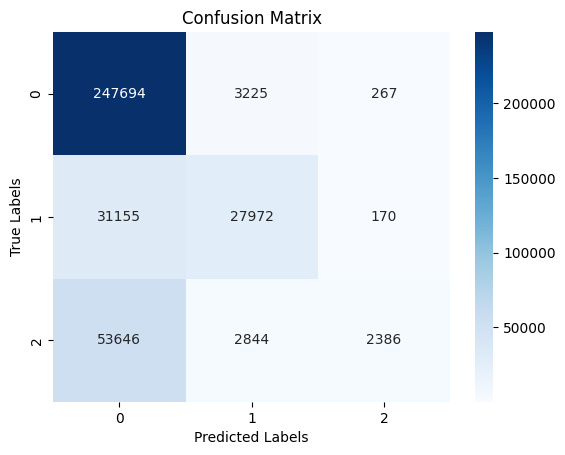

In [16]:
from utils import cal_acc_pres_f1
true_labels = gnn.dgl_graph.edata["Relationship"][test_mak]
predicted_scores = scores.detach().numpy()[test_mak]
cal_acc_pres_f1(predicted_scores,true_labels, threshold=None)

# BGP2VEC

## Import Emberddings

In [23]:
# Embeddings ASN BGP2VEC
import os
from bgp2vec.bgp2vec import BGP2VEC
from gensim.models import Word2Vec

oix_path = os.getcwd()+  "/datasets/RouteViews/Download/oix-full-snapshot-2022-06-30-2000.bz2"
test_limit = 1000 #cantidad paths/horaciones
mode = 'test' # par limitar cantidad de paths/oraciones
epochs = 1
debug = True
model_path = os.getcwd()+"/bgp2vec/bgp2vec.word2vec"

# Crea embeddings de ASN con  BGP2VEC y lo guarda en "/bgp2vec/bgp2vec.word2vec"
bgp2vec = BGP2VEC(model_path = model_path ,oix_path=oix_path,rewrite=True, test_limit= test_limit, mode = mode, epochs = epochs)

print("[MODELO]",bgp2vec.model)
print("[TOTAL ASN]",bgp2vec.model.corpus_total_words)


# index = bgp2vec.model.wv['701']
# print(f"[INDEX ASN {'701'}] {index}")
# print(f"[INDEX ASN {'701'}] {bgp2vec.asn2vec('701')}")
# print("IMPOT ")
# MODELS_PATH = os.getcwd() + "/bgp2vec/bgp2vec.word2vec"
# print(f"PATH {MODELS_PATH}")
# BGP2Vec_model = Word2Vec.load(MODELS_PATH)

[MODELO] Word2Vec<vocab=64, vector_size=32, alpha=0.025>
[TOTAL ASN] 3754


In [26]:
MODELS_PATH = os.getcwd() + "/bgp2vec/bgp2vec.word2vec"

# Importar embeddings ASN
BGP2Vec_model = Word2Vec.load(MODELS_PATH)

emdeddings = BGP2Vec_model.wv.vectors
total_ASNs, embedding_vecor_length = emdeddings.shape

print(f"[TOTAL ASN]: {total_ASNs}\n[EMBEDDINGS LEN]: {embedding_vecor_length}" )
# print(f"[EMBEDDINGS] {emdeddings}")

[TOTAL ASN]: 64
[EMBEDDINGS LEN]: 32
